In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (25,10)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Mohammad-Kaosain-Akbar/NILM-two-years-dataset/main/Data_Greener_all.csv')
df['Time']= pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               43824 non-null  datetime64[ns]
 1   Ventilation        43824 non-null  float64       
 2   Sokets plug        43824 non-null  float64       
 3   Lighting           43824 non-null  float64       
 4   Other electricity  43824 non-null  float64       
 5   Cooling            43824 non-null  float64       
 6   Heating            43824 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.3 MB


In [ ]:
Total = df["Ventilation"] + df["Sokets plug"] + df["Lighting"] + df["Other electricity"] + df["Cooling"] + df["Heating"]
# https://www.kite.com/python/answers/how-to-sum-two-columns-in-a-pandas-dataframe-in-python

df["Total"] = Total

In [ ]:
df

,Time,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total
0,2017-01-03 13:00:00,27.4,41.8,53.7,89.6,18.60,498.0,729.10
1,2017-01-03 14:00:00,21.6,37.5,50.9,64.6,61.90,500.0,736.50
2,2017-01-03 15:00:00,18.5,37.4,60.1,64.2,16.50,480.0,676.70
3,2017-01-03 16:00:00,29.7,38.0,52.6,43.2,19.80,390.0,573.30
4,2017-01-03 17:00:00,16.7,38.1,56.7,42.4,15.20,373.0,542.10
...,...,...,...,...,...,...,...,...
43819,2022-01-03 08:00:00,59.3,17.9,16.6,115.0,12.70,344.0,565.50
43820,2022-01-03 09:00:00,71.9,20.6,33.1,149.0,11.90,399.0,685.50
43821,2022-01-03 10:00:00,90.5,30.9,47.8,157.0,12.90,397.0,736.10
43822,2022-01-03 11:00:00,94.0,33.9,52.2,155.0,15.40,345.0,695.50


In [ ]:
df.describe()

,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,32.433825,18.414002,14.316892,87.846242,47.084925,68.994602,269.090489
std,36.211287,27.666459,15.064466,94.951663,71.422794,113.328362,180.713964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.130000
25%,7.000000,11.400000,3.690000,35.800000,13.600000,5.500000,151.377500
50%,14.100000,13.600000,6.500000,79.600000,21.500000,12.300000,208.180000
75%,56.800000,20.100000,22.500000,103.000000,51.600000,89.000000,336.000000
max,793.000000,980.000000,132.000000,971.000000,1641.000000,1120.000000,2037.000000


In [ ]:
df['Year'] = df['Time'].dt.year
df['Month']=df['Time'].dt.month
df['Quarter_of_year']=df['Time'].dt.quarter
df['Day_of_week']=df['Time'].dt.day_of_week
df['Week_of_year']=df['Time'].dt.week
df['Day']=df['Time'].dt.day
df['Hour']=df['Time'].dt.hour

df.drop('Time', inplace=True, axis=1)

In [ ]:
df

,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total,Year,Month,Quarter_of_year,Day_of_week,Week_of_year,Day,Hour
0,27.4,41.8,53.7,89.6,18.60,498.0,729.10,2017,1,1,1,1,3,13
1,21.6,37.5,50.9,64.6,61.90,500.0,736.50,2017,1,1,1,1,3,14
2,18.5,37.4,60.1,64.2,16.50,480.0,676.70,2017,1,1,1,1,3,15
3,29.7,38.0,52.6,43.2,19.80,390.0,573.30,2017,1,1,1,1,3,16
4,16.7,38.1,56.7,42.4,15.20,373.0,542.10,2017,1,1,1,1,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,59.3,17.9,16.6,115.0,12.70,344.0,565.50,2022,1,1,0,1,3,8
43820,71.9,20.6,33.1,149.0,11.90,399.0,685.50,2022,1,1,0,1,3,9
43821,90.5,30.9,47.8,157.0,12.90,397.0,736.10,2022,1,1,0,1,3,10
43822,94.0,33.9,52.2,155.0,15.40,345.0,695.50,2022,1,1,0,1,3,11


In [ ]:
df1_train = df.loc[(df['Year'].isin([2017,2018]))]
 
##################################################################
 
df1_test = df.loc[(df['Year'].isin([2019]))]  # general model
 
df2_test = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([6,7,8,9]))]  # summer
 
df3_test = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([12,1,2,3]))]  # winter
 
df4_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([1,2,3,4,5,6,7,8]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  # early morning 1am to 8 am
 
df5_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([9,10,11,12,13,14,15,16,17,18,19]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  # working hours 9am to 7pm
 
df6_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([20,21,22,23,0]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  #night hours 8 pm to 12 am
 
df7_test = df.loc[(df['Year'].isin([2019]))&(df['Day_of_week'].isin([5,6]))]  # weekend
 
 
print('df_train.shape: ', df1_train.shape)
print('df_test.shape: ', df1_test.shape)
 


df_train.shape:  (17459, 14)
df_test.shape:  (8760, 14)


In [ ]:
# conda install tensorflow

In [ ]:
df1_train

,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total,Year,Month,Quarter_of_year,Day_of_week,Week_of_year,Day,Hour
0,27.4,41.8,53.70,89.60,18.60,498.0,729.10,2017,1,1,1,1,3,13
1,21.6,37.5,50.90,64.60,61.90,500.0,736.50,2017,1,1,1,1,3,14
2,18.5,37.4,60.10,64.20,16.50,480.0,676.70,2017,1,1,1,1,3,15
3,29.7,38.0,52.60,43.20,19.80,390.0,573.30,2017,1,1,1,1,3,16
4,16.7,38.1,56.70,42.40,15.20,373.0,542.10,2017,1,1,1,1,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17454,0.0,11.7,7.50,11.60,8.69,250.0,289.49,2018,12,4,0,1,31,19
17455,0.0,10.9,9.38,10.50,8.75,234.0,273.53,2018,12,4,0,1,31,20
17456,0.0,12.0,8.06,7.50,10.40,233.0,270.96,2018,12,4,0,1,31,21
17457,0.0,10.3,6.75,9.63,10.90,234.0,271.58,2018,12,4,0,1,31,22


In [ ]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies  # without the dependencies if you already have TF/Numpy.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tcn import TCN
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
X_train1 = df1_train[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_train1 = df1_train[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
X_test1 = df1_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df1_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape)

(17459, 5) (17459, 6) (8760, 5) (8760, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1=sc.fit_transform(X_test1)

In [ ]:
model = Sequential()
model.add(TCN(
      input_shape = (5,1),
      nb_filters=64,
      dilations=(1, 2, 4, 8, 16, 32),
      activation='relu',
      padding='causal',       
))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(6))

model.summary()

model.compile(loss='mae', optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 64)                136256    
                                                                 
 dense (Dense)               (None, 500)               32500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 6)                 3006      
                                                                 
Total params: 923,262
Trainable params: 923,262
Non-trai

In [ ]:

model.fit(X_train1, y_train1, epochs=250, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)

Epoch 1/250
464/464 [==============================] - 26s 14ms/step - loss: 14.2075 - val_loss: 25.6963
Epoch 2/250
464/464 [==============================] - 4s 9ms/step - loss: 10.5742 - val_loss: 26.2305
Epoch 3/250
464/464 [==============================] - 4s 9ms/step - loss: 10.1069 - val_loss: 25.2428
Epoch 4/250
464/464 [==============================] - 4s 9ms/step - loss: 9.6069 - val_loss: 24.1771
Epoch 5/250
464/464 [==============================] - 4s 9ms/step - loss: 9.4925 - val_loss: 23.0335
Epoch 6/250
464/464 [==============================] - 4s 9ms/step - loss: 9.1578 - val_loss: 23.0832
Epoch 7/250
464/464 [==============================] - 4s 9ms/step - loss: 9.0808 - val_loss: 21.6531
Epoch 8/250
464/464 [==============================] - 4s 9ms/step - loss: 8.8327 - val_loss: 22.5348
Epoch 9/250
464/464 [==============================] - 4s 9ms/step - loss: 8.6911 - val_loss: 23.8708
Epoch 10/250
464/464 [==============================] - 4s 9ms/step - loss: 8

In [ ]:
pred = model.predict(X_test1)


**GENERAL**

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

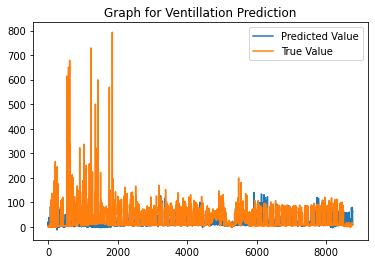

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  18.818702456485898

Root Mean Sqaured Error is:  34.49209629582756

R2 score is:  0.1281627902914273


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

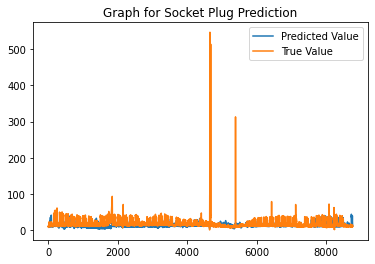

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  6.137521730096155

Root Mean Sqaured Error is:  13.004441662896284

R2 score is:  -0.011998012106151146


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

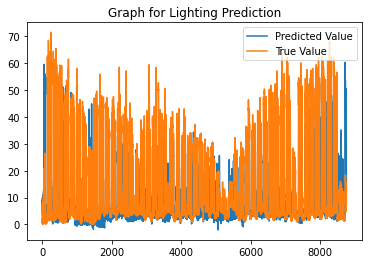

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  8.568331225985425

Root Mean Sqaured Error is:  13.897677076002223

R2 score is:  0.22939730164850025


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

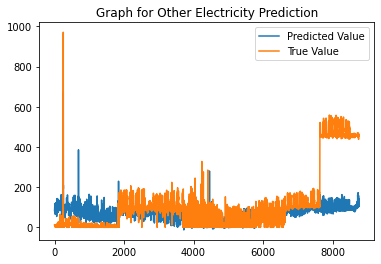

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  83.07870207657827

Root Mean Sqaured Error is:  139.3998714719363

R2 score is:  0.06711302716145184


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

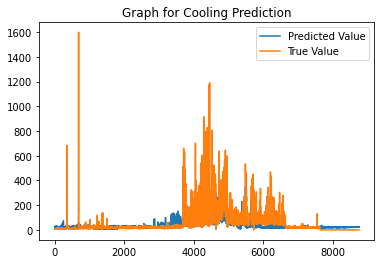

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  29.429389330056157

Root Mean Sqaured Error is:  58.0073719386926

R2 score is:  0.5407692875371688


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

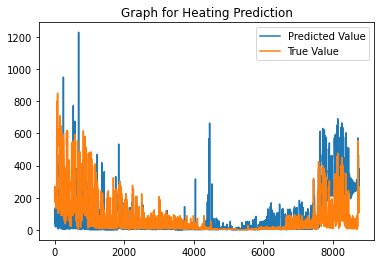

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  56.89650283268679

Root Mean Sqaured Error is:  99.55325215221788

R2 score is:  0.11896714897329519


**SUMMER**

In [ ]:
X_test1 = df2_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df2_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2928, 5) (2928, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

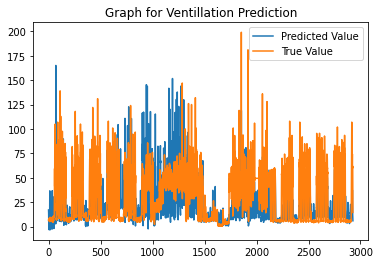

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  18.717779810002757

Root Mean Sqaured Error is:  26.596923567664625

R2 score is:  -0.043572367769904474


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

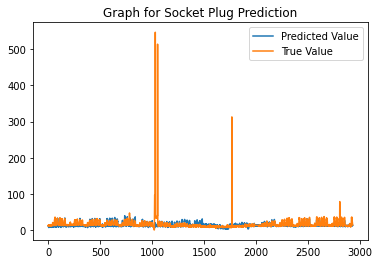

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.9261838552365536

Root Mean Sqaured Error is:  17.142602857984933

R2 score is:  0.011669152998975307


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

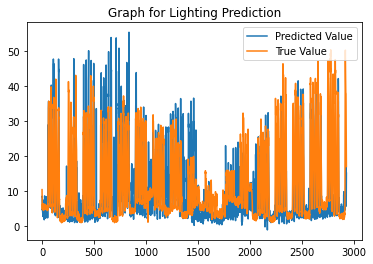

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  6.183235248361617

Root Mean Sqaured Error is:  9.972232206932294

R2 score is:  0.1930631263514342


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

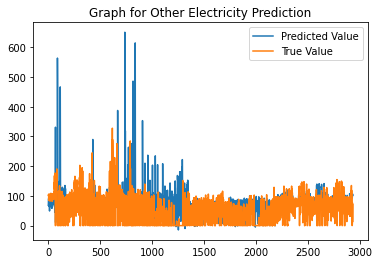

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  42.159635359573564

Root Mean Sqaured Error is:  62.5250091124383

R2 score is:  -0.949277845339767


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

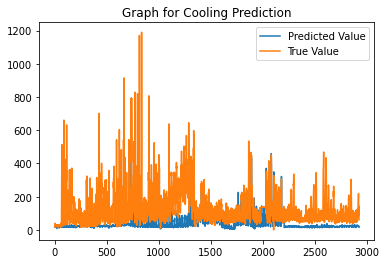

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  89.93865846278237

Root Mean Sqaured Error is:  135.63466255557734

R2 score is:  -0.5252004854054042


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

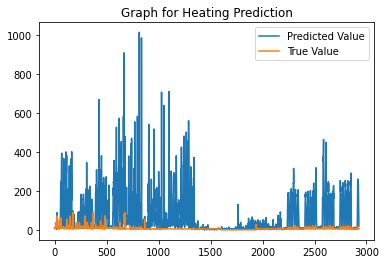

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  62.01836212100309

Root Mean Sqaured Error is:  118.42677996196434

R2 score is:  -446.9353906924133


**WINTER**

In [ ]:
X_test1 = df3_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df3_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2903, 5) (2903, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

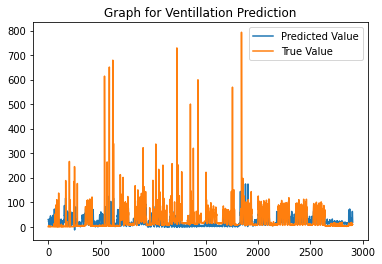

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  21.906383281588184

Root Mean Sqaured Error is:  47.31265437965115

R2 score is:  0.12279681400508824


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

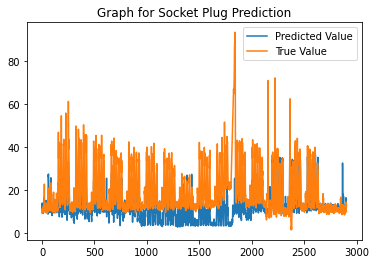

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  7.983675260120041

Root Mean Sqaured Error is:  11.857183299220951

R2 score is:  -0.15879705647908904


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

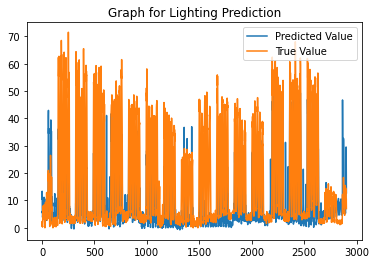

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  10.081274818833105

Root Mean Sqaured Error is:  15.389729703447054

R2 score is:  0.2945307299183494


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

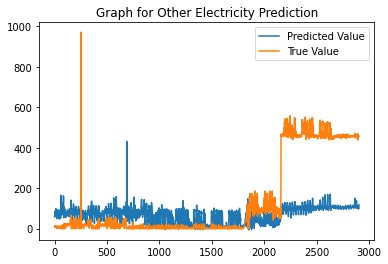

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  131.9556265383431

Root Mean Sqaured Error is:  190.8957853768805

R2 score is:  0.06758227360687263


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

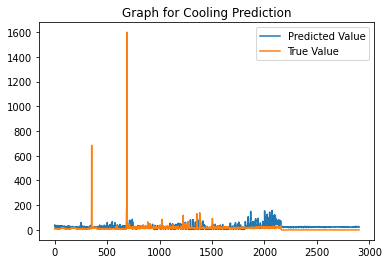

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  17.82500965185425

Root Mean Sqaured Error is:  39.11393490244555

R2 score is:  -0.2883695179647374


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

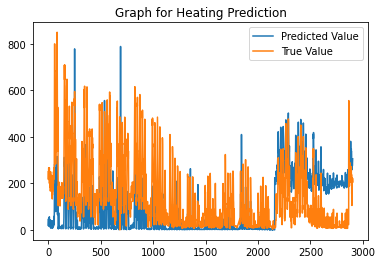

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  120.77311768793788

Root Mean Sqaured Error is:  150.5407985626583

R2 score is:  -0.0882743887212547


**Early Morning (1am to 8am)**

In [ ]:
X_test1 = df4_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df4_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2088, 5) (2088, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

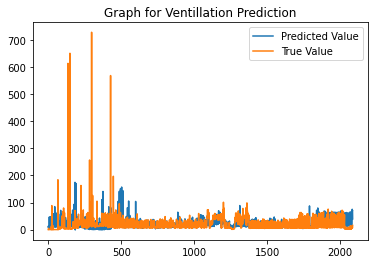

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  16.2569698356052

Root Mean Sqaured Error is:  37.26600065513316

R2 score is:  -0.0752733711934801


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

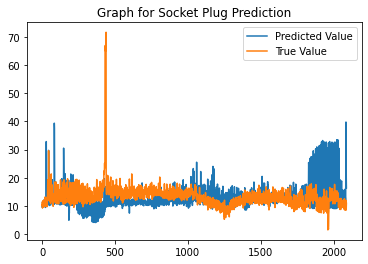

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  3.4838229933004277

Root Mean Sqaured Error is:  6.000857976221799

R2 score is:  -1.0718775891247474


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

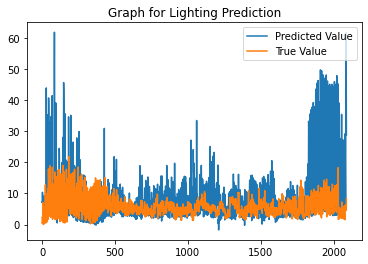

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.827653607312976

Root Mean Sqaured Error is:  9.294394582587381

R2 score is:  -11.74349841982852


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

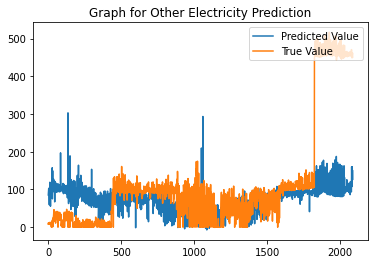

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  77.50563619684259

Root Mean Sqaured Error is:  132.27317391303734

R2 score is:  0.08049928608286439


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

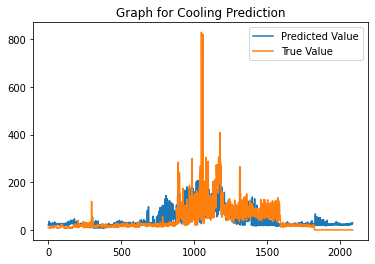

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  23.76124469491257

Root Mean Sqaured Error is:  44.02141660956512

R2 score is:  0.33164376447561583


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

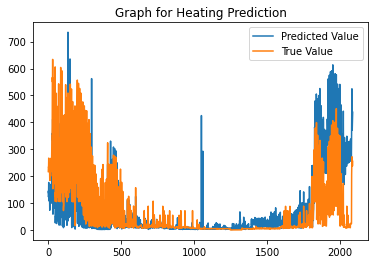

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  52.52405795321382

Root Mean Sqaured Error is:  96.4245168176863

R2 score is:  0.246613634450078


**Working Hours (9am to 7pm)**

In [ ]:
X_test1 = df5_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df5_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2871, 5) (2871, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

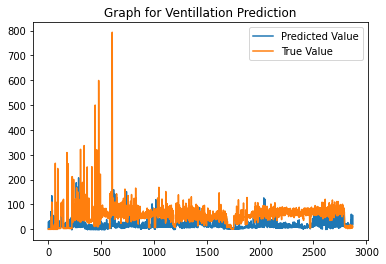

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  40.995729410835196

Root Mean Sqaured Error is:  53.27513333213734

R2 score is:  -1.0487437014886654


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

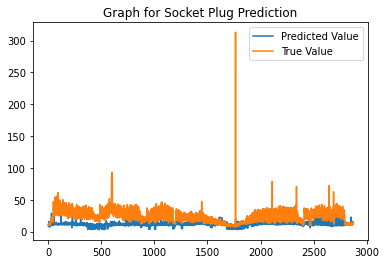

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  14.587227383895602

Root Mean Sqaured Error is:  18.90543814719995

R2 score is:  -1.2554733609401296


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

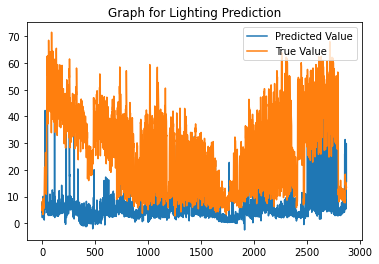

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  25.242702892783292

Root Mean Sqaured Error is:  29.09760016963741

R2 score is:  -2.93914631864476


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

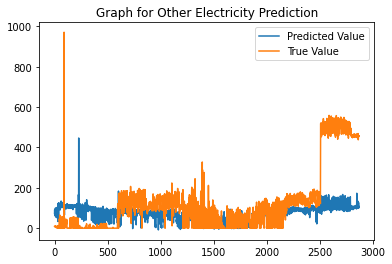

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  96.4093228743709

Root Mean Sqaured Error is:  148.48046007155932

R2 score is:  0.05552487141593021


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

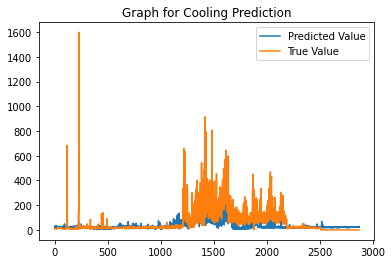

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  45.39666329275893

Root Mean Sqaured Error is:  84.88044215642753

R2 score is:  0.3410946541561809


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

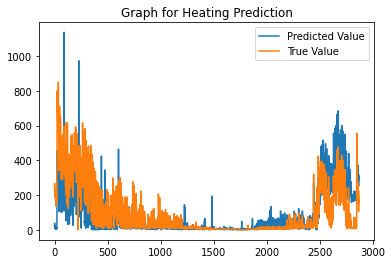

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  61.95523326853682

Root Mean Sqaured Error is:  102.62970665069611

R2 score is:  0.447124568856479


**Night (8pm to 12am)**

In [ ]:
X_test1 = df6_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df6_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(1305, 5) (1305, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

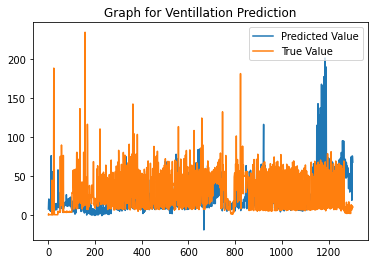

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  20.984623327120055

Root Mean Sqaured Error is:  30.76364654431497

R2 score is:  -0.512196337475296


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

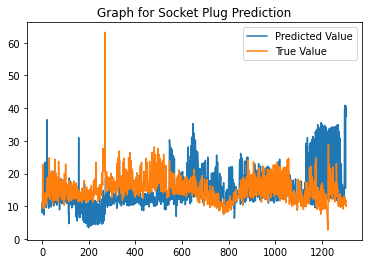

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.252206639308125

Root Mean Sqaured Error is:  7.491177749918731

R2 score is:  -2.960822560512414


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

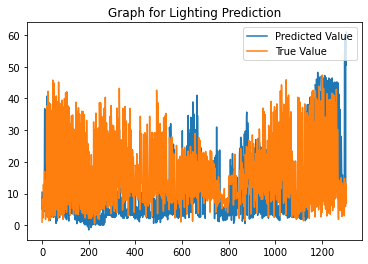

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  11.659945165562355

Root Mean Sqaured Error is:  15.051636447679604

R2 score is:  -1.2557005661747112


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

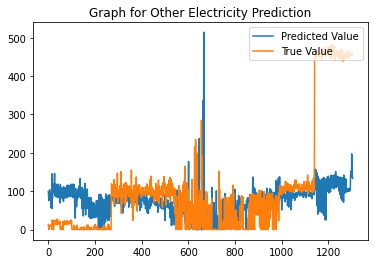

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  80.05824092762533

Root Mean Sqaured Error is:  132.78703192488467

R2 score is:  0.11056069938441049


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

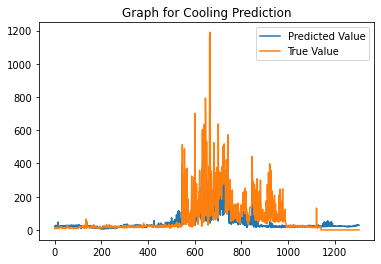

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  38.63091266056221

Root Mean Sqaured Error is:  83.35826346898334

R2 score is:  0.43061901139869063


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

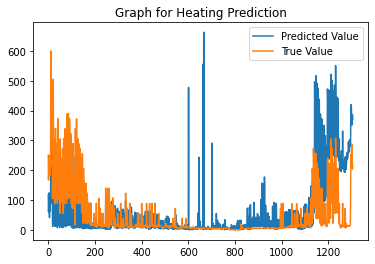

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  50.619744586648615

Root Mean Sqaured Error is:  89.64099680347273

R2 score is:  -0.3541889349556784


**Weekends (Saturday and Sunday)**

In [ ]:
X_test1 = df7_test[['Total', 'Year', 'Month', 'Day', 'Hour']].values
y_test1 = df7_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2496, 5) (2496, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

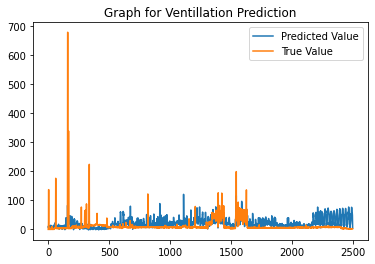

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  15.857577198556218

Root Mean Sqaured Error is:  26.877023218208805

R2 score is:  -0.4288488003797999


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

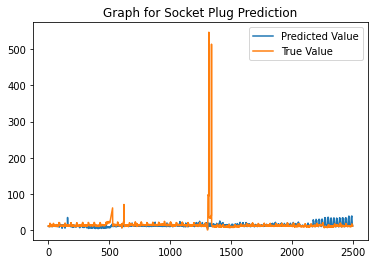

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.751132867790186

Root Mean Sqaured Error is:  16.600256944883732

R2 score is:  -0.07729920198209905


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

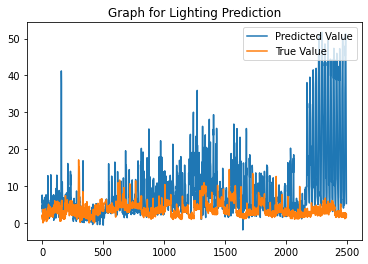

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.787793796040214

Root Mean Sqaured Error is:  10.61772999712856

R2 score is:  -32.079201058402255


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

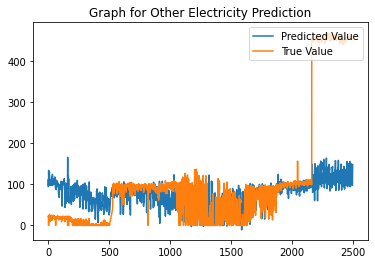

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  73.67080030325742

Root Mean Sqaured Error is:  130.4074394469675

R2 score is:  0.14144495422756775


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

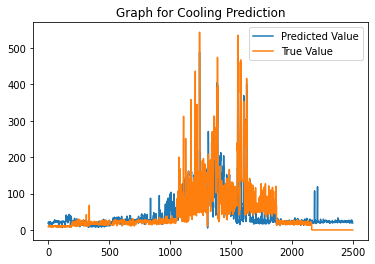

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  21.31536112860227

Root Mean Sqaured Error is:  33.309268894935336

R2 score is:  0.7067996478129621


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

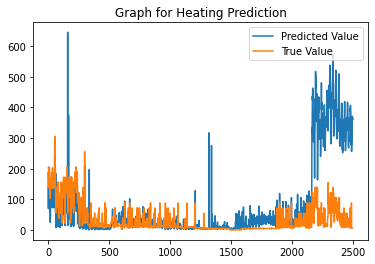

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  60.0371419957242

Root Mean Sqaured Error is:  122.70796011272571

R2 score is:  -6.848087326667601
